# Dynamic Programming for Rob Cutting

In [69]:
from collections import defaultdict
original_price=[1,5,8,9,10,17,17,20,24,30]
price=defaultdict(int)
for i,p in enumerate(original_price):
    price[i+1]=p
assert price[1]==1

In [70]:
price[1]

1

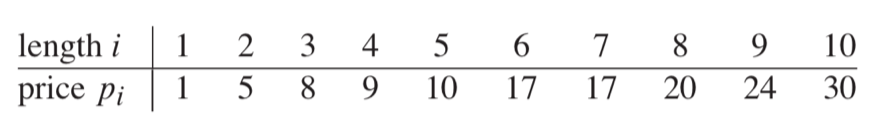

In [71]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "C:/Users/liam/Desktop/deep learning/NLP/4/"
Image(filename = PATH + "Picture1.png", width=500, height=200)

只能计算出总价钱，不能计算分配方案

In [72]:
def r(n):
    return max(
        [price[n],0]+[r(i)+r(n-i) for i in range(1,n)]
    )

In [73]:
r(10)

30

可以计算出分配方案

In [74]:
solution={}
## for a given length N, we set the corrsponding split parts
## solution = 
# {
#     4: (2, 2)
# }

In [75]:
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [76]:
solution

{}

In [77]:
r(15)

43

# 装饰器用法
加速。在functools这个模块中，装饰器存在的作用主要是用来做缓存，他能把相对耗时的函数结果进行保存，避免传入相同的参数重复计算。

In [78]:
from functools import wraps
def memo(func):
    cache = {}
    @wraps(func)
    def _wrap(n): 
        if n in cache: result = cache[n]
        else:
            result = func(n)
            cache[n] = result
        return result
    return _wrap

In [79]:
@memo
def r(n):
    max_price, split_point = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (split_point, n - split_point)
    
    return max_price

In [80]:
r(231)

691

# Dynamic Programming
不断查表的意思

分析子问题的重复性

子问题进行存储

Solution 要进行解析

In [81]:
def not_cut(split): return split == 0#不为0时为false，为0时为true
def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]   
    if not_cut(left): return [right]
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [82]:
parse_solution(19, solution)

[3, 6, 10]

# Edit Distance
边界距离

In [86]:
from functools import lru_cache
solution = {}
@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
##code    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    solution[(string1, string2)] = operation 
    
    return min_distance

In [87]:
edit_distance('ABCDE', 'ABCCEF')

2

In [88]:
solution

{('A', 'A'): '',
 ('A', 'AB'): 'ADD B',
 ('A', 'ABC'): 'ADD C',
 ('A', 'ABCC'): 'ADD C',
 ('A', 'ABCCE'): 'ADD E',
 ('A', 'ABCCEF'): 'ADD F',
 ('AB', 'A'): 'DEL B',
 ('AB', 'AB'): '',
 ('AB', 'ABC'): 'ADD C',
 ('AB', 'ABCC'): 'ADD C',
 ('AB', 'ABCCE'): 'ADD E',
 ('AB', 'ABCCEF'): 'ADD F',
 ('ABC', 'A'): 'DEL C',
 ('ABC', 'AB'): 'DEL C',
 ('ABC', 'ABC'): '',
 ('ABC', 'ABCC'): 'ADD C',
 ('ABC', 'ABCCE'): 'ADD E',
 ('ABC', 'ABCCEF'): 'ADD F',
 ('ABCD', 'A'): 'DEL D',
 ('ABCD', 'AB'): 'DEL D',
 ('ABCD', 'ABC'): 'DEL D',
 ('ABCD', 'ABCC'): 'SUB D => C',
 ('ABCD', 'ABCCE'): 'ADD E',
 ('ABCD', 'ABCCEF'): 'ADD F',
 ('ABCDE', 'A'): 'DEL E',
 ('ABCDE', 'AB'): 'DEL E',
 ('ABCDE', 'ABC'): 'DEL E',
 ('ABCDE', 'ABCC'): 'DEL E',
 ('ABCDE', 'ABCCE'): '',
 ('ABCDE', 'ABCCEF'): 'ADD F'}